# Wine Quality Data Set - Exploring all our ML algorithms on this !

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA on the DataSet

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.shape

(1599, 12)

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Lets see what the values of quality can end up taking!

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [11]:
print(f"The values of wine quality generally lie in between {min(df['quality'].unique())} and {max(df['quality'].unique())}")

The values of wine quality generally lie in between 3 and 8


In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Our data set has no missing values , Very Good!!

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


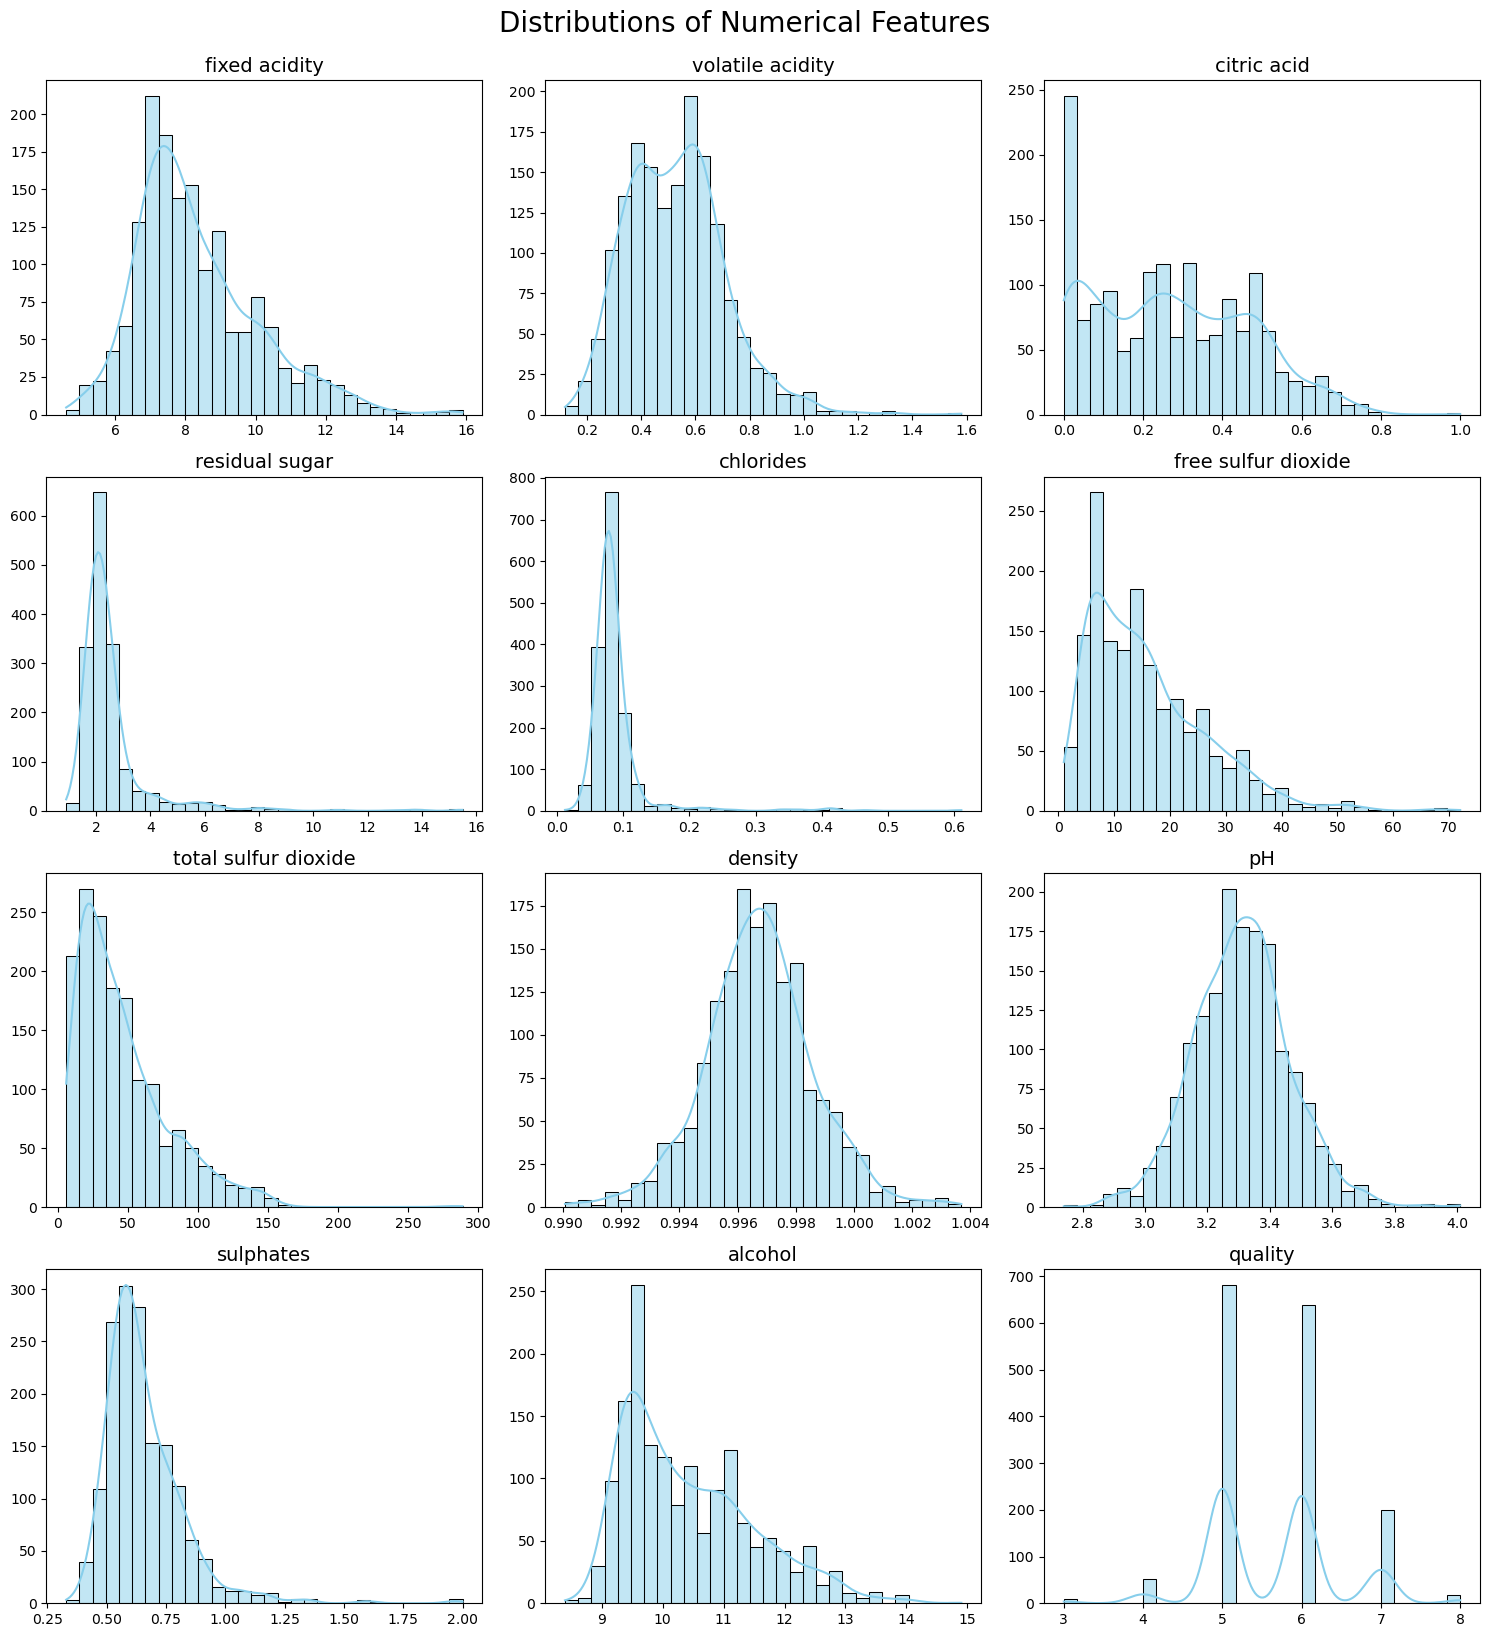

In [21]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up subplot grid
n_cols = 3  # Adjust columns to fit screen, 3–4 works well
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Distributions of Numerical Features', fontsize=20, y=1.02)
plt.show()

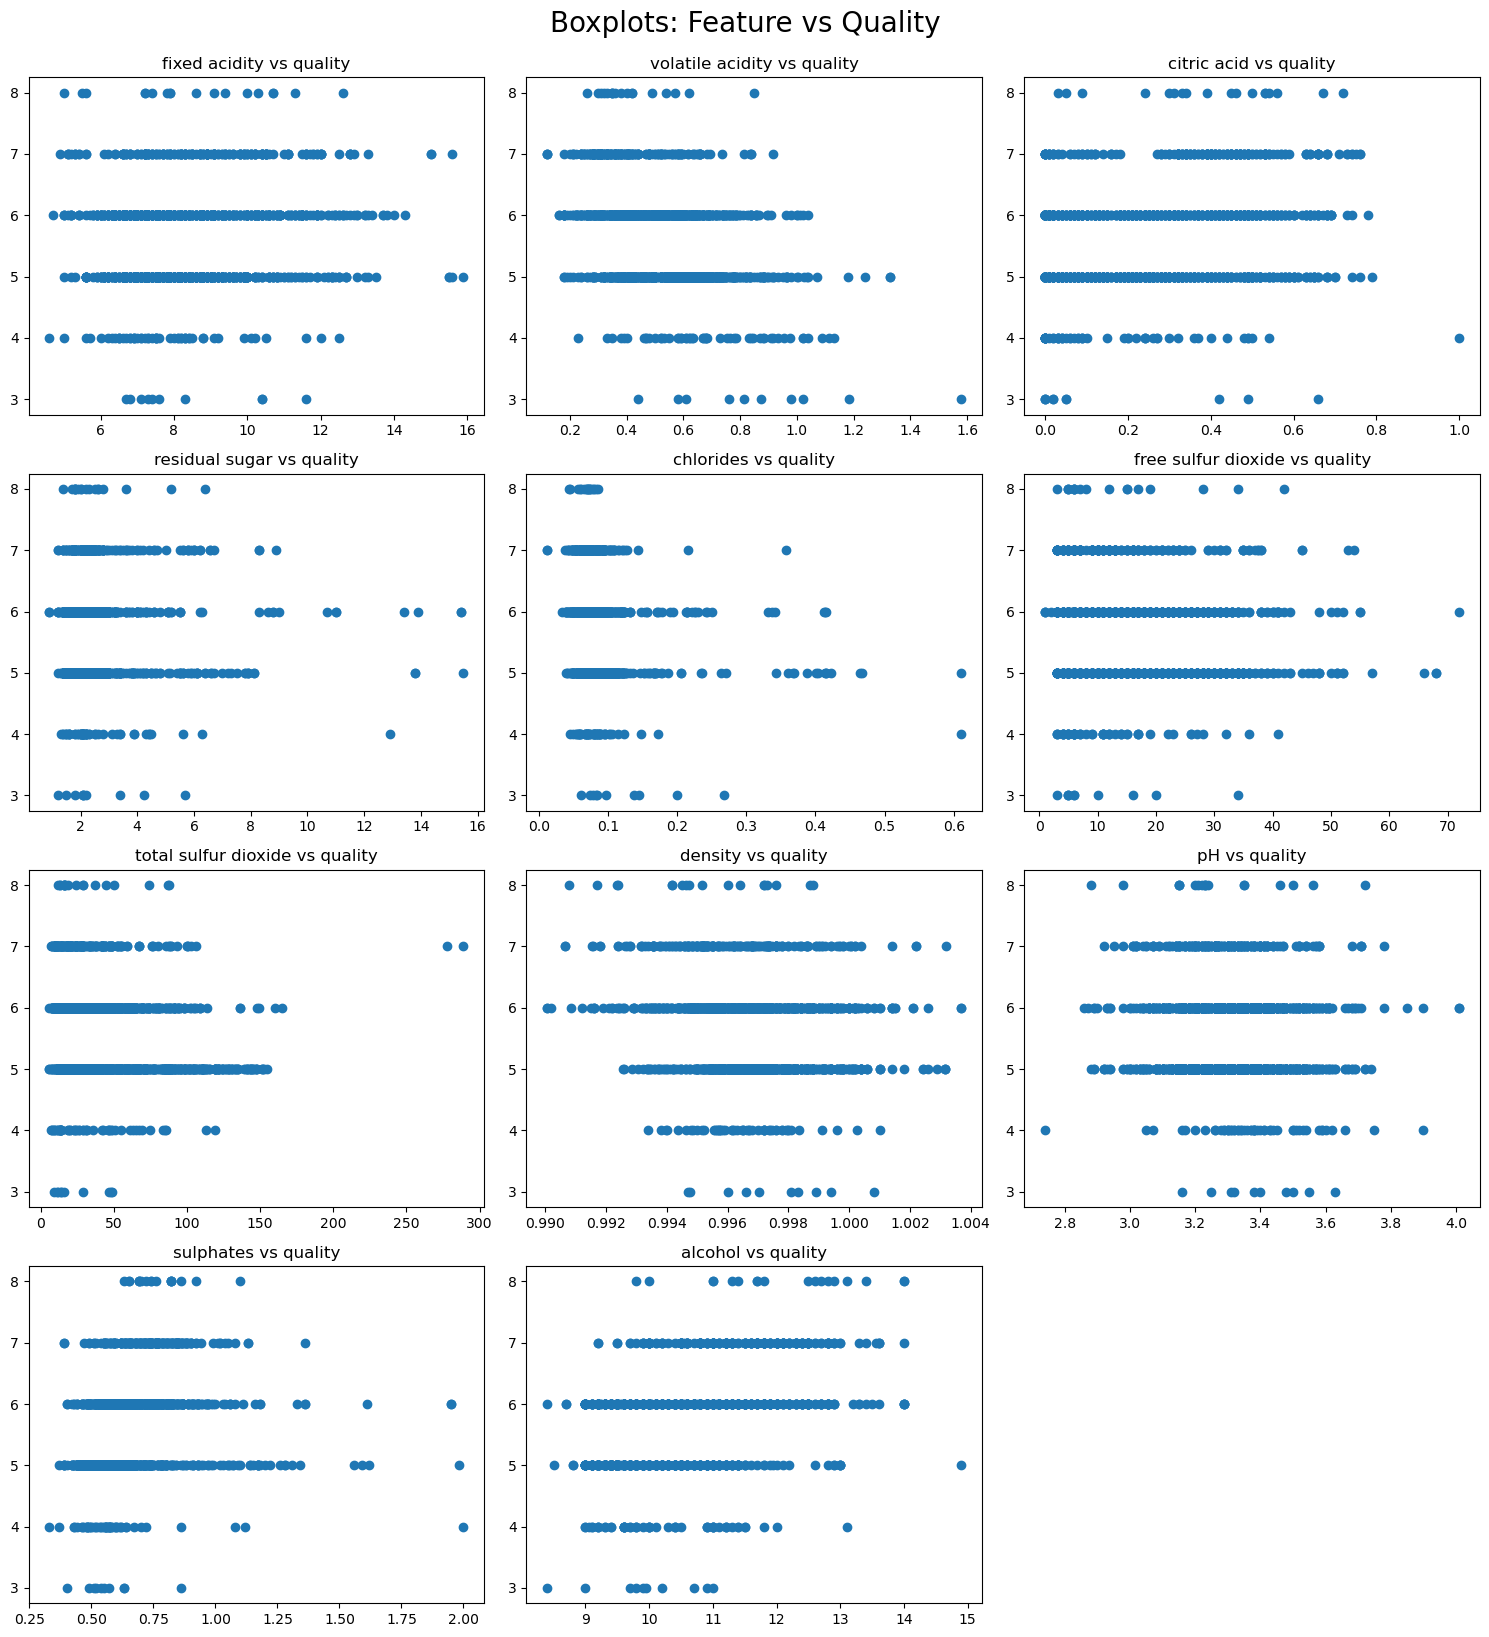

In [28]:
target = 'quality'  # Replace if your target is different

# Select numeric columns excluding target
num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != target]

# Set up subplot grid
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(x=col, y=target,data=df)
    plt.title(f'{col} vs {target}')
    plt.tight_layout()

plt.suptitle('Boxplots: Feature vs Quality', fontsize=20, y=1.02)
plt.show()

In [30]:
y = df['quality']
X = df.drop(columns= ['quality'])
X.shape

(1599, 11)

In [31]:
y.shape

(1599,)

In [33]:
X_train, X_test , y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape

(1279, 11)

In [34]:
from sklearn.preprocessing import StandardScaler
scaleStandard = StandardScaler()
## let us scale the whole data set and then do the train test split
XScaled = scaleStandard.fit_transform(X)
XScaledDataFrame = pd.DataFrame(XScaled, columns = X.columns)


In [36]:
X_train, X_test , y_train, y_test = train_test_split(XScaled,y,random_state=42,test_size=0.2)
X_train.shape


(1279, 11)

# Linear Regression and it's variants 

## Lasso Regression -L1 reg

## Vanilla Regression

In [47]:
# A typical code
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)
yPred = LinReg.predict(X_test)

mse = mean_squared_error(y_test,yPred)
r2 = r2_score(y_test, yPred)

print("🔢 Coefficients:", LinReg.coef_)
print("🎯 Intercept:", LinReg.intercept_)
print("📉 Mean Squared Error:", mse)
print("📈 R² Score:", r2)

🔢 Coefficients: [ 0.04018122 -0.1792372  -0.0274236   0.00925231 -0.08499703  0.05884439
 -0.11984784 -0.0195308  -0.06076105  0.14253987  0.30030663]
🎯 Intercept: 5.629424674390097
📉 Mean Squared Error: 0.3900251439639549
📈 R² Score: 0.403180341279622


## Ridge Regression - R2 regression

In [49]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=1)
ridgeReg.fit(X_train,y_train)
yPredRidge = ridgeReg.predict(X_test)

print("📏 Ridge Coefficients:", ridgeReg.coef_)
print("📉 MSE:", mean_squared_error(y_test, yPredRidge))
print("📈 R² Score:", r2_score(y_test, yPredRidge))

📏 Ridge Coefficients: [ 0.04063895 -0.17904075 -0.02712651  0.0094367  -0.0849558   0.05866265
 -0.11969518 -0.02016304 -0.0603247   0.14252801  0.29972754]
📉 MSE: 0.3900365808244969
📈 R² Score: 0.4031628405022717


In [50]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

print("🧹 Non-zero features:", sum(lasso_reg.coef_ != 0))
print("📉 MSE:", mean_squared_error(y_test, y_pred))
print("📈 R² Score:", r2_score(y_test, y_pred))


🧹 Non-zero features: 0
📉 MSE: 0.6571600689645265
📈 R² Score: -0.005591701339940913


# Classification and its friends

In [55]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# breaking our output data into labels
df['quality_label'] = pd.cut(df['quality'], bins=[0,5,6,10], labels=['Low', 'Medium', 'High'])


In [56]:
X = df.drop(columns=['quality', 'quality_label'])
y = df['quality_label']
# Quality binning
df['quality_label'] = pd.cut(df['quality'], bins=[0,5,6,10], labels=['Low', 'Medium', 'High'])

X = df.drop(columns=['quality', 'quality_label'])
y = df['quality_label']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define pipeline
logisticRegPipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scales data inside the pipeline
    ('logit', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit on training data
logisticRegPipeline.fit(X_train, y_train)

# Predict on test data
yPredLr = logisticRegPipeline.predict(X_test)
print("Logistic Regression - Test Performance: \n", classification_report(y_test, yPredLr))

# Predict on training data (pipeline already scales internally)
yTrainLr = logisticRegPipeline.predict(X_train)
print("Logistic Regression - Train Performance: \n", classification_report(y_train, yTrainLr))


Logistic Regression - Test Performance: 
               precision    recall  f1-score   support

        High       0.52      0.35      0.42        43
         Low       0.67      0.75      0.71       149
      Medium       0.51      0.50      0.51       128

    accuracy                           0.60       320
   macro avg       0.57      0.53      0.54       320
weighted avg       0.59      0.60      0.59       320

Logistic Regression - Train Performance: 
               precision    recall  f1-score   support

        High       0.65      0.41      0.50       174
         Low       0.72      0.78      0.75       595
      Medium       0.58      0.60      0.59       510

    accuracy                           0.66      1279
   macro avg       0.65      0.60      0.61      1279
weighted avg       0.66      0.66      0.65      1279



Remark : Both test and train performances are pretty bad - the model is Underfitting

## Random Forest Classification 

In [67]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),  # Optional for RF but consistent for comparison
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

        High       0.71      0.58      0.64        43
         Low       0.80      0.83      0.81       149
      Medium       0.70      0.72      0.71       128

    accuracy                           0.75       320
   macro avg       0.74      0.71      0.72       320
weighted avg       0.75      0.75      0.75       320



## KNN for classification

In [68]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)

print("k-NN:\n", classification_report(y_test, y_pred_knn))


k-NN:
               precision    recall  f1-score   support

        High       0.47      0.53      0.50        43
         Low       0.69      0.70      0.70       149
      Medium       0.56      0.52      0.54       128

    accuracy                           0.61       320
   macro avg       0.57      0.59      0.58       320
weighted avg       0.61      0.61      0.61       320



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

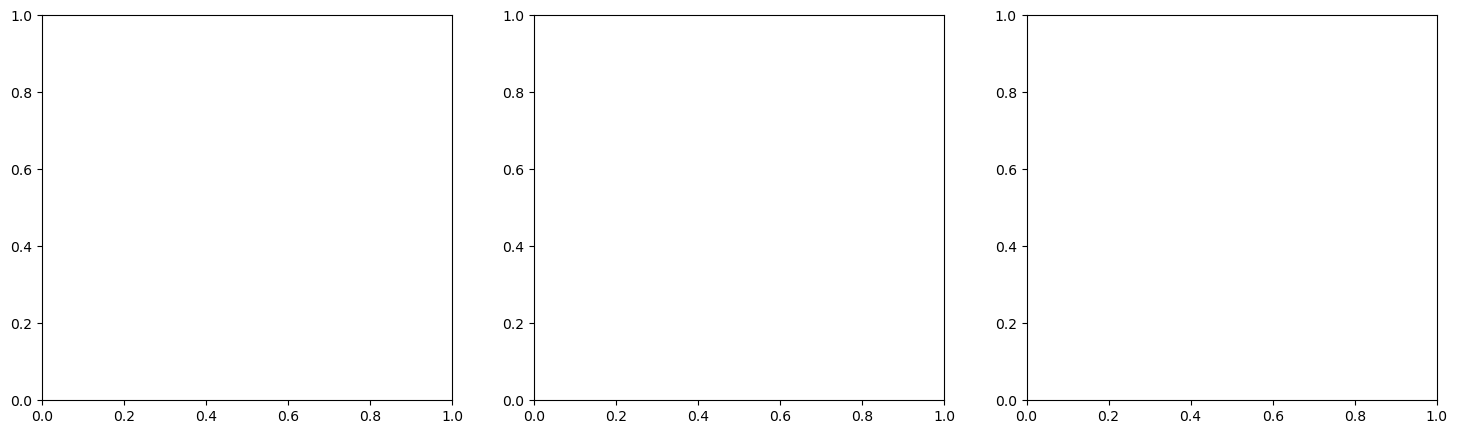

In [69]:
# Imports and loading data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the wine dataset


# Convert quality into categories for classification
df['quality_label'] = pd.cut(df['quality'], bins=[0, 5, 6, 10], labels=['Low', 'Medium', 'High'])

# Features and labels
X = df.drop(columns=['quality', 'quality_label'])
y_class = df['quality_label']
y_reg = df['quality']

# Split and scale
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
X_train_pca_df['label'] = y_train_class.values

X_test_pca_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
X_test_pca_df['label'] = y_test_class.values

X_train_pca_array = X_train_pca_df[['PC1', 'PC2']].values
y_train_class_array = y_train_class.values

# Define kernels and parameters for SVC
kernels = ['linear', 'poly', 'rbf']
models = {}

# Fit SVM classifiers with different kernels
for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma='scale', probability=True)
    model.fit(X_train_pca_array, y_train_class_array)
    models[kernel] = model

# Create mesh for decision boundary visualization
h = .02  # step size in the mesh
x_min, x_max = X_train_pca_array[:, 0].min() - 1, X_train_pca_array[:, 0].max() + 1
y_min, y_max = X_train_pca_array[:, 1].min() - 1, X_train_pca_array[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (kernel, model) in enumerate(models.items()):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x='PC1', y='PC2', hue='label', data=X_train_pca_df, ax=ax, palette='Set2', edgecolor='k')
    ax.set_title(f"SVM with {kernel} kernel")
plt.tight_layout()

# Now train SVR for regression using different kernels
svr_results = {}
for kernel in kernels:
    svr_model = SVR(kernel=kernel, C=1.0, gamma='scale')
    svr_model.fit(X_train_scaled, y_train_reg)
    preds = svr_model.predict(X_test_scaled)
    svr_results[kernel] = preds

# Show all plots
plt.show()
